In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from graph_colouring_problem import obtain_colours, create_adjacent_matrix

In [2]:
def number_to_discrete_color(index, total_colors):
    cmap = plt.get_cmap('tab20', total_colors)
    rgba = cmap(index / total_colors)
    return mcolors.to_hex(rgba)

In [3]:
# Load the shapefile (this path assumes you have the shapefile locally)
gdf = gpd.read_file('./COMARQUES/divisions-administratives-v2r1-comarques-250000-20240701.shp')
gdf['NOM'] = gdf['NOMCOMAR']
"""gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')
gdf['NOM'] = gdf['NOMMUNI']"""

"gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')\ngdf['NOM'] = gdf['NOMMUNI']"

In [4]:
matriu = create_adjacent_matrix(gdf)
color_numbers, report_data, time = obtain_colours(matriu, population_size = 10, prob_mutation = 0.2, max_generations = 200,
                   crossover_type = 'one-point', crossover_prob = 0.5)

print(color_numbers)

Number of colors: 8, Generation: 75
Number of colors: 7, Generation: 100
Number of colors: 6, Generation: 155
Number of colors: 5, Generation: 170
[0 4 1 4 3 4 2 3 0 2 3 2 4 0 1 2 4 0 1 0 1 4 2 0 1 0 3 2 1 4 2 3 1 3 1 4 3
 1 2 1 2 3 1]


In [5]:
# Get the unique numbers from the list and assign each a color
unique_numbers = list(set(color_numbers))
total_unique_colors = len(unique_numbers)

# Create a dictionary mapping each unique number to a color
number_color_mapping = {num: number_to_discrete_color(i, total_unique_colors) for i, num in enumerate(unique_numbers)}

# Now map each comarca name to its corresponding color based on its number
comarca_colors = {name: number_color_mapping[num] for name, num in zip(gdf['NOM'], color_numbers)}

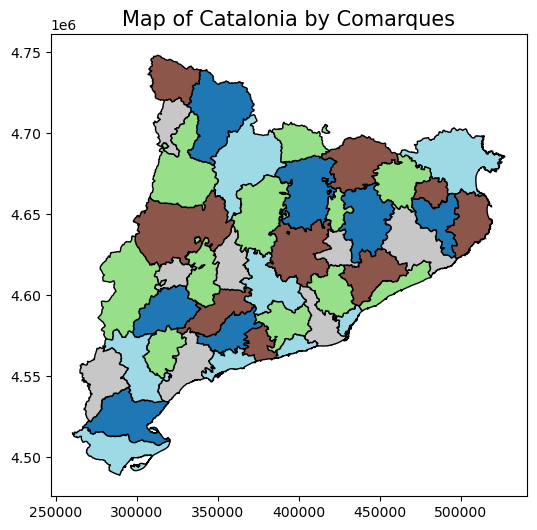

In [6]:
# Create a new column for colors based on the comarca names
gdf['color'] = gdf['NOM'].map(comarca_colors).fillna('#FFFFFF')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(ax=ax, color=gdf['color'], edgecolor='black')
ax.set_title("Map of Catalonia by Comarques", fontsize=15)
plt.show()

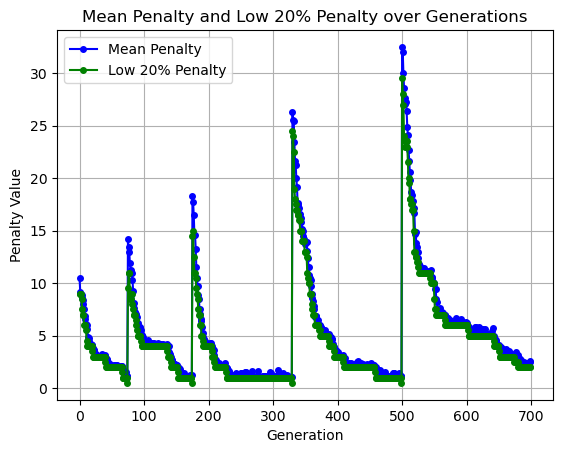

In [8]:
plt.plot(report_data['Generation'], report_data['Mean Penalty'], label='Mean Penalty', marker='o', markersize=4, color='blue')

# Plot for Low 5% Penalty
plt.plot(report_data['Generation'], report_data['Low 20% penalty'], label='Low 20% Penalty', marker='o', markersize=4, color='green')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Penalty Value')
plt.title('Mean Penalty and Low 20% Penalty over Generations')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()